<a href="https://colab.research.google.com/github/crux007/crux007/blob/main/Auto_bidding_system_job_Publisher_based_advertising_using_Bayesian_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
!pip install scikit-optimize

In [59]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from skopt import gp_minimize
from skopt.space import Real
from skopt.plots import plot_convergence

In [60]:
data = pd.read_csv("/content/drive/MyDrive/cpa - Sheet1.csv")

In [61]:
data.head(5)

,Date,Campaign,Campaign ID,Publisher,Publisher ID,Spend,Clicks,Applies,CPC,CPA,CR
0,2023-06-01,US Navy (WaveMaker) (USD) Default Segment,157270,ZipRecruiter (USD) (Direct),17078,13.78,63,0,0.22,0.0,0.0
1,2023-06-01,US Navy (WaveMaker) (USD) Default Segment,157270,Hallimjolken (USD),28991,1.80,10,0,0.18,0.0,0.0
2,2023-06-01,US Navy (WaveMaker) (USD) Default Segment,157270,Results Generation (USD),29779,0.00,23,0,0.00,0.0,0.0
3,2023-06-01,US Navy (WaveMaker) (USD) Default Segment,157270,Adzuna (USD) (A-Direct),28753,0.00,0,0,0.00,0.0,0.0
4,2023-06-01,US Navy (WaveMaker) (USD) Default Segment,157270,Talent.com (USD),17106,0.88,4,0,0.22,0.0,0.0


In [62]:
data['Date'] = pd.to_datetime(data['Date'])
data['day_of_week'] = data['Date'].dt.day_name()

In [63]:
data.head(5)

,Date,Campaign,Campaign ID,Publisher,Publisher ID,Spend,Clicks,Applies,CPC,CPA,CR,day_of_week
0,2023-06-01,US Navy (WaveMaker) (USD) Default Segment,157270,ZipRecruiter (USD) (Direct),17078,13.78,63,0,0.22,0.0,0.0,Thursday
1,2023-06-01,US Navy (WaveMaker) (USD) Default Segment,157270,Hallimjolken (USD),28991,1.80,10,0,0.18,0.0,0.0,Thursday
2,2023-06-01,US Navy (WaveMaker) (USD) Default Segment,157270,Results Generation (USD),29779,0.00,23,0,0.00,0.0,0.0,Thursday
3,2023-06-01,US Navy (WaveMaker) (USD) Default Segment,157270,Adzuna (USD) (A-Direct),28753,0.00,0,0,0.00,0.0,0.0,Thursday
4,2023-06-01,US Navy (WaveMaker) (USD) Default Segment,157270,Talent.com (USD),17106,0.88,4,0,0.22,0.0,0.0,Thursday


In [64]:
data['day_of_week'] = data['day_of_week'].replace({
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6,
    'Sunday': 7
})

In [65]:
data['Publisher'] = data['Publisher'].replace({
    'Adzuna (USD) (A-Direct)': 0,
    'Appcast Exchange CPC': 1,
    'Career Matching Platform (CMP) (USD)': 2,
    'Get It CPC (USD) (A-Direct)': 3,
    'Hallimjolken (USD)': 4,
    'JobAdX (USD)': 5,
    'JobGet (USD)': 6,
    'JobLift (USD)' : 7,
    'PandoLogic (USD)' : 8,
    'Results Generation (USD)' : 9,
    'Resume Library CPC (USD)' : 10,
    'Talent.com (USD)' : 11,
    'Tideri (USD)' : 12,
    'Unique Traffic Group (USD)' : 13,
    'ZipRecruiter (USD) (Direct)' :14
})

In [66]:
data.head(10)

,Date,Campaign,Campaign ID,Publisher,Publisher ID,Spend,Clicks,Applies,CPC,CPA,CR,day_of_week
0,2023-06-01,US Navy (WaveMaker) (USD) Default Segment,157270,14,17078,13.78,63,0,0.22,0.00,0.00,4
1,2023-06-01,US Navy (WaveMaker) (USD) Default Segment,157270,4,28991,1.80,10,0,0.18,0.00,0.00,4
2,2023-06-01,US Navy (WaveMaker) (USD) Default Segment,157270,9,29779,0.00,23,0,0.00,0.00,0.00,4
3,2023-06-01,US Navy (WaveMaker) (USD) Default Segment,157270,0,28753,0.00,0,0,0.00,0.00,0.00,4
4,2023-06-01,US Navy (WaveMaker) (USD) Default Segment,157270,11,17106,0.88,4,0,0.22,0.00,0.00,4
5,2023-06-02,US Navy (WaveMaker) (USD) Default Segment,157270,9,29779,0.00,4,0,0.00,0.00,0.00,5
6,2023-06-02,US Navy (WaveMaker) (USD) Default Segment,157270,12,29387,267.80,1430,1,0.19,267.80,0.07,5
7,2023-06-02,US Navy (WaveMaker) (USD) Default Segment,157270,11,17106,55.00,253,1,0.22,55.00,0.40,5
8,2023-06-02,US Navy (WaveMaker) (USD) Default Segment,157270,10,17122,6.51,23,2,0.28,3.26,8.70,5
9,2023-06-02,US Navy (WaveMaker) (USD) Default Segment,157270,3,17064,0.21,1,0,0.21,0.00,0.00,5


In [67]:
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(data[["Publisher", "Spend", "Clicks", "Applies", "CPC", "CPA", "CR", "day_of_week"]])

In [68]:
non_zero_conversion_rates = normalized_data[:, 3][normalized_data[:, 3] != 0]
mean_conversion_rate = np.mean(non_zero_conversion_rates)

In [69]:
normalized_data[:, 3][normalized_data[:, 3] == 0] = mean_conversion_rate

In [70]:
def objective(cpc_list):
    total_cost_per_application = 0
    for i, cpc in enumerate(cpc_list):
        conversion_rate = normalized_data[i, 3]
        cost_per_click = cpc
        applies = Applies
        cost_per_application = cost_per_click / conversion_rate
        print(f"Publisher {i+1}: Conversion Rate: {conversion_rate}, CPC: {cpc}, Cost per App: {cost_per_application}")
        total_cost_per_application += cost_per_application
    return total_cost_per_application



In [71]:
num_publishers = len(data)
space = [Real(0.1, 1.0, name=f'cpc_{i}') for i in range(num_publishers)]

In [72]:
def objective(cpc_list):
    total_cost_per_application = 0
    for i, cpc in enumerate(cpc_list):
        conversion_rate = normalized_data[i, 3]
        cost_per_click = cpc
        try:
            cost_per_application = cost_per_click / conversion_rate
        except ZeroDivisionError:
            cost_per_application = float('inf')  # Handle division by zero
        total_cost_per_application += cost_per_application
    return total_cost_per_application

In [73]:
# Run Bayesian Optimization for a fixed number of iterations
num_iterations = 20
best_cpc_values = []

for iteration in range(num_iterations):
    results = gp_minimize(
        lambda x: objective(x),
        space,
        n_calls=10,
        random_state=42 + iteration,
        verbose=True
    )

    best_cpc_values.append(results.x)

Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.0416
Function value obtained: 1420.4484
Current minimum: 1420.4484
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.0383
Function value obtained: 1407.5082
Current minimum: 1407.5082
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.0391
Function value obtained: 1424.0112
Current minimum: 1407.5082
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 0.0265
Function value obtained: 1399.8675
Current minimum: 1399.8675
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 0.0376
Function value obtained: 1510.9947
Current minimum: 1399.8675
Itera

In [74]:
# Adaptive Adjustments based on performance
average_conversion_rate = np.mean(normalized_data[:, 3])

In [75]:
for i, best_cpc in enumerate(best_cpc_values):
    publisher_conversion_rate = normalized_data[i, 3]  # Assuming conversion rate is in the fourth column
    if publisher_conversion_rate > average_conversion_rate:
        best_cpc_values[i] = [cpc * 1.1 for cpc in best_cpc]  # Increase CPC by 10%
    else:
        best_cpc_values[i] = [cpc * 0.9 for cpc in best_cpc]  # Decrease CPC by 10%

In [76]:
for i, best_cpc in enumerate(best_cpc_values):
    formatted_cpcs = [f"{cpc:.4f}" for cpc in best_cpc]
    formatted_cpc_str = ', '.join(formatted_cpcs)
    print(f"Publisher {i+1}: Best CPC values: {formatted_cpc_str}")

Publisher 1: Best CPC values: 0.2677, 0.1725, 0.2265, 0.3351, 0.4483, 0.4871, 0.4529, 0.3467, 0.6146, 0.9270, 0.3869, 1.0430, 0.9746, 0.2701, 0.8884, 0.6788, 0.6709, 0.4971, 0.6061, 0.5032, 0.6443, 0.7317, 0.7776, 0.6372, 0.8242, 0.2499, 0.3199, 0.9205, 0.4293, 0.1327, 0.2623, 0.3314, 1.0577, 0.6773, 1.0334, 0.6794, 0.5846, 0.4206, 0.7103, 0.2478, 0.9993, 0.9310, 0.4244, 1.0533, 0.9269, 0.7696, 0.2305, 0.5835, 0.6110, 0.3402, 0.1892, 0.8790, 0.2308, 0.6983, 1.0371, 0.9773, 0.3850, 0.9529, 0.1103, 0.1275, 0.7065, 0.4712, 0.4926, 0.6688, 0.2999, 0.3196, 0.5898, 0.8567, 0.7233, 0.4044, 0.5360, 0.2790, 0.1839, 0.8849, 0.3727, 0.2860, 0.7947, 0.7219, 0.7369, 0.3366, 0.3403, 0.3286, 0.2820, 0.7592, 0.9495, 0.8271, 0.8942, 0.5108, 0.7575, 0.4607, 0.6302, 0.5868, 0.2851, 0.4932, 1.0642, 0.3561, 0.2425, 0.5244, 0.8924, 0.6863, 0.7842, 0.2978, 0.7228, 0.4303, 0.9360, 0.7330, 0.3069, 0.1740, 0.1522, 0.4777, 0.3732, 0.7496, 0.6043, 0.3734, 0.2577, 0.2359, 0.9660, 0.3510, 0.7552, 0.9126, 0.7179, 0.

In [88]:
new_data = pd.DataFrame({
    'Publisher': [10],
    'Spend': [70.73],
    'Clicks': [213],
    'Applies': [6],
    'CPC': [0.36],
    'CPA': [11.79],
    'CR': [2.17],
    'day_of_week': [3]
})

In [89]:
new_normalized_data = scaler.transform(new_data[["Publisher", "Spend", "Clicks", "Applies", "CPC", "CPA", "CR", "day_of_week"]])

In [90]:
recommended_cpc_values = best_cpc_values[0]

In [91]:
results = gp_minimize(
    lambda x: objective(x),
    space,
    n_calls=10,
    random_state=42,
    verbose=True
)

Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.0249
Function value obtained: 1420.4484
Current minimum: 1420.4484
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.0317
Function value obtained: 1407.5082
Current minimum: 1407.5082
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.0446
Function value obtained: 1424.0112
Current minimum: 1407.5082
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 0.0395
Function value obtained: 1399.8675
Current minimum: 1399.8675
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 0.0389
Function value obtained: 1510.9947
Current minimum: 1399.8675
Itera

In [92]:
new_average_conversion_rate = new_normalized_data[0, 3]

if new_average_conversion_rate > average_conversion_rate:
    recommended_cpc_values = [cpc * 1.1 for cpc in recommended_cpc_values]  # Increase CPC by 10%
else:
    recommended_cpc_values = [cpc * 0.9 for cpc in recommended_cpc_values]

In [93]:
formatted_cpcs = [f"{cpc:.4f}" for cpc in recommended_cpc_values]
formatted_cpc_str = ', '.join(formatted_cpcs)
print(f"Recommended CPC values for new input data: {formatted_cpc_str}")

Recommended CPC values for new input data: 0.2409, 0.1552, 0.2038, 0.3016, 0.4034, 0.4384, 0.4076, 0.3120, 0.5532, 0.8343, 0.3482, 0.9387, 0.8771, 0.2431, 0.7996, 0.6110, 0.6038, 0.4474, 0.5455, 0.4529, 0.5799, 0.6585, 0.6998, 0.5734, 0.7418, 0.2249, 0.2879, 0.8285, 0.3864, 0.1194, 0.2360, 0.2982, 0.9520, 0.6096, 0.9301, 0.6115, 0.5261, 0.3785, 0.6393, 0.2230, 0.8994, 0.8379, 0.3819, 0.9479, 0.8343, 0.6927, 0.2075, 0.5251, 0.5499, 0.3062, 0.1702, 0.7911, 0.2077, 0.6285, 0.9334, 0.8796, 0.3465, 0.8576, 0.0993, 0.1148, 0.6359, 0.4240, 0.4433, 0.6019, 0.2699, 0.2877, 0.5308, 0.7710, 0.6510, 0.3639, 0.4824, 0.2511, 0.1655, 0.7964, 0.3355, 0.2574, 0.7152, 0.6497, 0.6632, 0.3029, 0.3063, 0.2957, 0.2538, 0.6832, 0.8546, 0.7444, 0.8048, 0.4597, 0.6818, 0.4146, 0.5672, 0.5281, 0.2566, 0.4439, 0.9578, 0.3205, 0.2182, 0.4720, 0.8032, 0.6177, 0.7057, 0.2680, 0.6505, 0.3872, 0.8424, 0.6597, 0.2762, 0.1566, 0.1370, 0.4299, 0.3359, 0.6747, 0.5439, 0.3360, 0.2320, 0.2123, 0.8694, 0.3159, 0.6797, 0.821

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

In [95]:
correlation_matrix = data.corr()

<ipython-input-95-19e8f3752a40>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


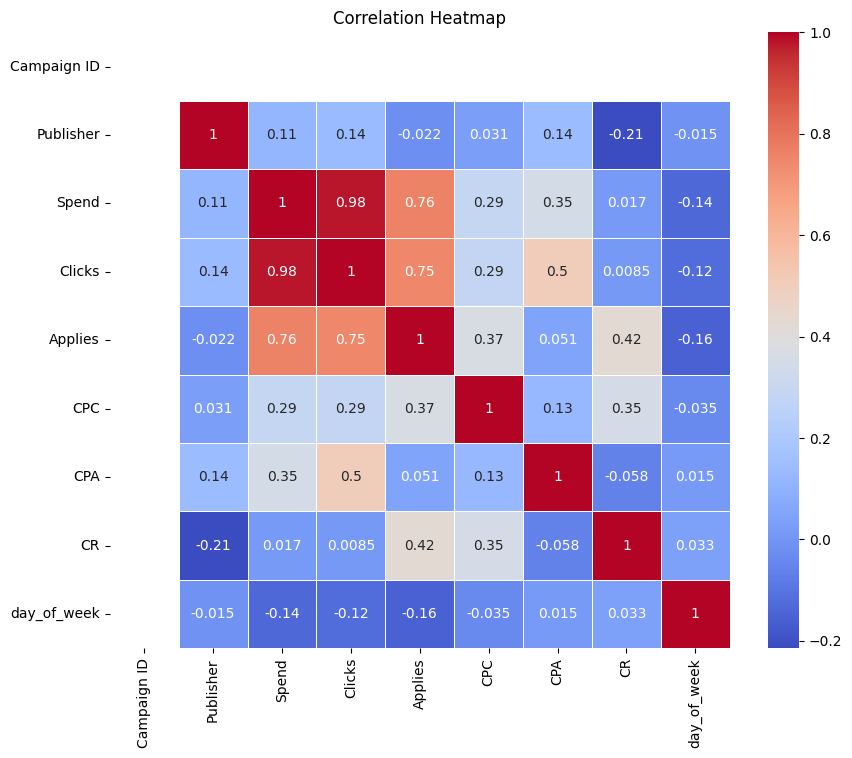

In [96]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()